In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
from sympy import init_printing
init_printing()

In [3]:
x

NameError: name 'x' is not defined

In [4]:
x = sympy.symbols('x')

In [5]:
x

In [6]:
5*x

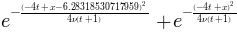

In [7]:
x, nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + \
sympy.exp(-(x-4*t-2*np.pi)**2/(4*nu*(t+1)))
phi

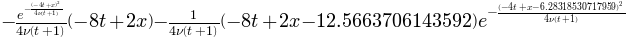

In [8]:
phiprime = phi.diff(x)
phiprime

In [9]:
#Unrendered version
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [10]:
from sympy.utilities.lambdify import lambdify

u = -2*nu*(phiprime/phi)+4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [11]:
u_lamb = lambdify((t, x, nu), u)
print("The value of u at t=1, x-4, nu=3 is {}.".format(u_lamb(1,4,3)))

The value of u at t=1, x-4, nu=3 is 3.4917066420644494.


In [13]:
###variable declarations
nx = 101
nt = 100
dx = 2*np.pi/(nx-1)
nu = 0.07
sigma = .1
dt = sigma*dx**2/nu

x = np.linspace(0, 2*np.pi, nx)
un = np.empty(nx)
t = 0

In [15]:
u = np.asarray([u_lamb(t, x0, nu) for x0 in x])
u

array([ 4.        ,  4.06283185,  4.12566371,  4.18849556,  4.25132741,
        4.31415927,  4.37699112,  4.43982297,  4.50265482,  4.56548668,
        4.62831853,  4.69115038,  4.75398224,  4.81681409,  4.87964594,
        4.9424778 ,  5.00530965,  5.0681415 ,  5.13097336,  5.19380521,
        5.25663706,  5.31946891,  5.38230077,  5.44513262,  5.50796447,
        5.57079633,  5.63362818,  5.69646003,  5.75929189,  5.82212374,
        5.88495559,  5.94778745,  6.0106193 ,  6.07345115,  6.136283  ,
        6.19911486,  6.26194671,  6.32477856,  6.38761042,  6.45044227,
        6.51327412,  6.57610598,  6.63893783,  6.70176967,  6.76460125,
        6.82742866,  6.89018589,  6.95176632,  6.99367964,  6.72527549,
        4.        ,  1.27472451,  1.00632036,  1.04823368,  1.10981411,
        1.17257134,  1.23539875,  1.29823033,  1.36106217,  1.42389402,
        1.48672588,  1.54955773,  1.61238958,  1.67522144,  1.73805329,
        1.80088514,  1.863717  ,  1.92654885,  1.9893807 ,  2.05

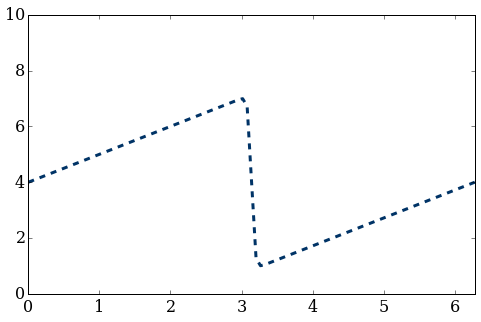

In [16]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(x,u, color='#003366', ls='--', lw=3)
plt.xlim([0,2*np.pi])
plt.ylim([0,10]);